In [1]:
import requests
import pandas as pd
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [2]:
api_key = "b04tby3zJ8rxxQtiYiedXUbDxk95j6oFNxGPwdfh"

In [3]:
# Define the API endpoint
url = "https://api.nasa.gov/planetary/apod"

In [4]:
# Create the parameters for the request, including the API key
params = {
    'api_key': api_key
}

# Send a GET request to the API
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    print("Request successful!")
    data = response.json()  # Convert the response to JSON
    print(data)  # Print the response data (e.g., the image details)
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

Request successful!
{'copyright': 'Ben Cooper', 'date': '2024-10-17', 'explanation': "NASA's Europa Clipper is now headed toward an ocean world beyond Earth. The large spacecraft is tucked into the payload fairing atop the Falcon Heavy rocket in this photo, taken at Kennedy Space Center the day before the mission's successful October 14 launch. Europa Clipper's interplanetary voyage will first take it to Mars, then back to Earth, and then on to Jupiter on gravity assist trajectories that will allow it to enter orbit around Jupiter in April 2030. Once orbiting Jupiter, the spacecraft will fly past Europa 49 times, exploring a Jovian moon with a global subsurface ocean that may have conditions to support life. Posing in the background next to the floodlit rocket is Comet Tsuchinsan-ATLAS, about a day after the comet's closest approach to Earth. A current darling of evening skies, the naked-eye comet is a visitor from the distant Oort cloud  Growing Gallery: Comet Tsuchinshan-ATLAS in 202

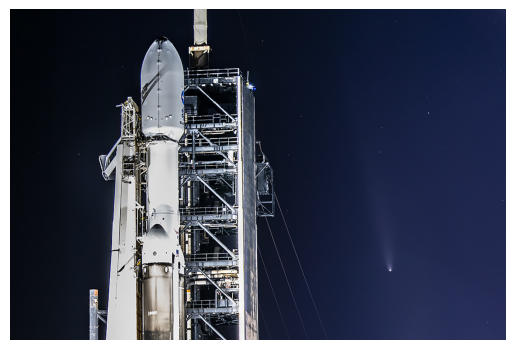

In [5]:
# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Convert response to JSON
    image_url = data['url']  # Get the image URL from the JSON response
    
    # Fetch the image from the URL
    image_response = requests.get(image_url)
    
    # Open the image using Pillow (PIL)
    img = Image.open(BytesIO(image_response.content))
    
    # Display the image using Matplotlib
    plt.imshow(img)
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

In [6]:
# Store the API key
api_key = "b04tby3zJ8rxxQtiYiedXUbDxk95j6oFNxGPwdfh"

# Define the NEO API endpoint
neo_url = f'https://api.nasa.gov/neo/rest/v1/neo/browse?api_key={api_key}'

# Make the API request
neo_response = requests.get(neo_url)
neo_data = neo_response.json()

# Convert the relevant data to a pandas DataFrame
asteroids = pd.json_normalize(neo_data['near_earth_objects'])

# Create a function to extract the first entry of close_approach_data if it exists
def extract_relative_velocity(asteroid):
    if len(asteroid['close_approach_data']) > 0:
        return asteroid['close_approach_data'][0]['relative_velocity']['kilometers_per_second']
    else:
        return None

# Apply the function to extract the relevant data for each asteroid
asteroids['Relative_Velocity_km_s'] = asteroids.apply(extract_relative_velocity, axis=1)

# Select necessary columns and rename them
asteroids_clean = asteroids[['id', 'name', 'estimated_diameter.kilometers.estimated_diameter_min', 
                             'absolute_magnitude_h', 'Relative_Velocity_km_s']]

# Rename the columns
asteroids_clean.columns = ['Asteroid_ID', 'Asteroid_Name', 'Min_Estimated_Diameter_km', 
                           'Absolute_Magnitude', 'Relative_Velocity_km_s']

# Display the cleaned DataFrame
print(asteroids_clean)

   Asteroid_ID                Asteroid_Name  Min_Estimated_Diameter_km  \
0      2000433           433 Eros (A898 PA)                  22.006703   
1      2000719         719 Albert (A911 TB)                   2.025606   
2      2000887         887 Alinda (A918 AA)                   4.534767   
3      2001036       1036 Ganymed (A924 UB)                  38.419789   
4      2001221         1221 Amor (1932 EA1)                   0.888290   
5      2001566        1566 Icarus (1949 MA)                   1.301832   
6      2001580       1580 Betulia (1950 KA)                   3.080030   
7      2001620    1620 Geographos (1951 RA)                   2.347226   
8      2001627          1627 Ivar (1929 SH)                   7.220296   
9      2001685          1685 Toro (1948 OA)                   3.703011   
10     2001862        1862 Apollo (1932 HA)                   1.616423   
11     2001863      1863 Antinous (1948 EA)                   2.160504   
12     2001864      1864 Daedalus (197

In [7]:
# Check for missing values
asteroids_clean.isnull().sum()

Asteroid_ID                  0
Asteroid_Name                0
Min_Estimated_Diameter_km    0
Absolute_Magnitude           0
Relative_Velocity_km_s       0
dtype: int64

In [8]:
# Check for duplicate rows
duplicates = asteroids_clean.duplicated()

# Display the duplicate rows
duplicate_rows = asteroids_clean[duplicates]

print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [Asteroid_ID, Asteroid_Name, Min_Estimated_Diameter_km, Absolute_Magnitude, Relative_Velocity_km_s]
Index: []


In [9]:
asteroids_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Asteroid_ID                20 non-null     object 
 1   Asteroid_Name              20 non-null     object 
 2   Min_Estimated_Diameter_km  20 non-null     float64
 3   Absolute_Magnitude         20 non-null     float64
 4   Relative_Velocity_km_s     20 non-null     object 
dtypes: float64(2), object(3)
memory usage: 932.0+ bytes


In [10]:
# Export the cleaned DataFrame to a CSV file
asteroids_clean.to_csv('asteroids_data.csv', index=False)

print("Data exported successfully to 'asteroids_data.csv'")

Data exported successfully to 'asteroids_data.csv'
